In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import sklearn.metrics  
from sklearn.metrics import mean_absolute_error


def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))



class KNN:

    def __init__(self,k=3):
        self.k = k

    

    def fit(self,X,y):
        self.X_train = X
        self.y_train = y



    # def predict(self, X):
    #     predicted_labels = [self._predict(x) for x in X]
    #     return np.array(predicted_labels)

    def nearest_neighbor_indices(self ,x):
        
        # compute distnaces
        distances = [euclidean_distance(x,x_train) for x_train in self.X_train]

        # get k nearest smaples, labels
        k_indices = np.argsort(distances)[:self.k]

        return k_indices




    def _predict(self , x):
       
        # get k nearest smaples, labels
        k_indices = self.nearest_neighbor_indices(x)
        k_nearest_labels = [self.y_train[i] for i in k_indices]


        # majority vote, most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


In [2]:
df = pd.read_csv('user_item.csv')
df_user_movie = df.pivot(index = 'userId', columns = 'movieId', values = 'rating')
df_user_movie = df_user_movie.fillna(0)

df_user_movie

movieId,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
userId,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df_movies = pd.read_csv('C:\\Users\\seyed\\Desktop\\RecommSys\\movies.csv', encoding='unicode_escape')
df_movies

,movieId,movieTitle,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn (1997),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy (1994),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
target_userId = 1
df_user_movie_without_target_user = df_user_movie.drop(target_userId)
df_user_movie_without_target_user

movieId,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
userId,,,,,,,,,,,,,,,,,,,,,
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [641]:
df_users_watched_target_movieId = df_user_movie_without_target_user[df_user_movie_without_target_user[target_movieId] != 0]
userIds_watched_target_movieId = list(df_users_watched_target_movieId.index)


In [642]:
# remove the movie we are trying to predict
target_movieId = 1
df_user_movie_without_target_movieId = df_user_movie_without_target_user.drop(target_movieId , axis =1)
df_user_movie_without_target_movieId


movieId,2,3,4,5,6,7,8,9,10,11,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
userId,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [644]:
# final df suitable for knn analysis
df_to_knn_analysis = df_user_movie_without_target_movieId.loc[
            df_user_movie_without_target_movieId.index.isin(userIds_watched_target_movieId)]
df_to_knn_analysis

movieId,2,3,4,5,6,7,8,9,10,11,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
userId,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,3.0,0.0,5.0,1.0,0.0,2.0,4.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
936,0.0,4.0,0.0,0.0,5.0,4.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
# X_train = []
X_train = df_to_knn_analysis.to_numpy()
y_train = df_user_movie_without_target_movieId[target_movieId].to_numpy()

# X_train.shape

In [680]:
# 3. Use the KNeighborsRegressor
# Using Euclidean Distance (We want to find top 5 closed users to the target user)
# from knn import KNN

clf = KNN(k = 8)

clf.fit(X_train, y_train)

x = df_user_movie.loc[target_userId].drop(target_movieId).to_numpy()# x is the vector profile of the target_user
closest_indices = clf.nearest_neighbor_indices(x) # it must return the closed userIds



In [681]:
df_closest_users = df_to_knn_analysis.iloc[closest_indices]
df_closest_users

movieId,2,3,4,5,6,7,8,9,10,11,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
userId,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
742,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
523,0.0,4.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
934,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
716,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
870,2.0,0.0,2.0,0.0,4.0,4.0,0.0,5.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:

def rating_prediction(target_userId, target_movieId, df_user_movie):
    
    df_user_movie_without_target_user = df_user_movie.drop(target_userId)

    df_users_watched_target_movieId = df_user_movie_without_target_user[df_user_movie_without_target_user[target_movieId] != 0]

    userIds_watched_target_movieId = list(df_users_watched_target_movieId.index)
    
    df_user_movie_without_target_movieId = df_user_movie_without_target_user.drop(target_movieId , axis =1)
    

    # final df suitable for knn analysis
    df_to_knn_analysis = df_user_movie_without_target_movieId.loc[
            df_user_movie_without_target_movieId.index.isin(userIds_watched_target_movieId)]
    
    
    X_train = df_to_knn_analysis.to_numpy()
    y_train = df_users_watched_target_movieId[target_movieId].to_numpy()
    

    clf = KNN(k = 12)
    clf.fit(X_train, y_train)
    
    x = df_user_movie.loc[target_userId].drop(target_movieId).to_numpy() # x is the vector profile of the target_user
    predicted_rating = clf._predict(x)


    return predicted_rating




def top_movies(target_userId , df_user_movie, num_top_movies = 10):

    predicted_ratings = []
    
    for movieId in df_user_movie.columns:
        predicted_ratings.append([rating_prediction(target_userId, movieId, df_user_movie),movieId])

    predicted_ratings = sorted(predicted_ratings)
    recommended_movieIds = [predicted_ratings[i][1] for i in range(len(predicted_ratings)-num_top_movies,len(predicted_ratings))]
    recommended_movieTitles = list(df_movies[df_movies['movieId'].isin(recommended_movieIds)]['movieTitle'])

    return recommended_movieTitles



    

    

In [708]:
top_movies(20,df_user_movie)

['Aparajito (1956)',
 'Magic Hour, The (1998)',
 "Someone Else's America (1995)",
 'Hurricane Streets (1998)',
 'Leading Man, The (1996)',
 'Lamerica (1994)',
 'Nico Icon (1995)',
 "Some Mother's Son (1996)",
 'Angel Baby (1995)',
 'Entertaining Angels: The Dorothy Day Story (1996)']

In [426]:
list(df_movies[df_movies['movieId'].isin([1503,1504])]['movieTitle'])

['Gold Diggers: The Secret of Bear Mountain (1995)',
 'Bewegte Mann, Der (1994)']

In [364]:
a = [4,3,7,31,31,9,85,85,85]
a = [[a[i],i] for i in range(len(a))]
a = sorted(a)
indices = [a[i][1] for i in range(len(a)-2,len(a))]
indices

[4, 6]

In [441]:
rating_prediction(6, 1, df_user_movie)

3.0

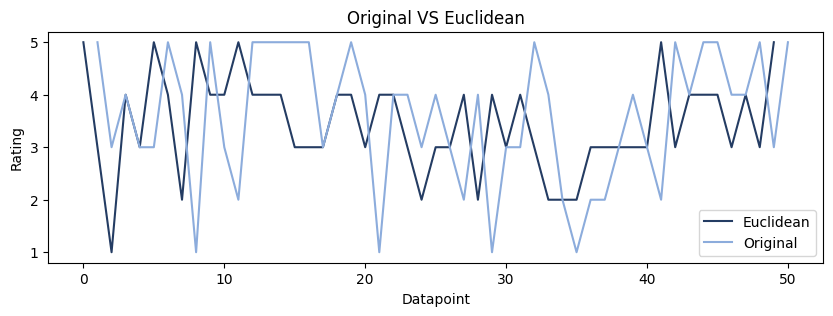

RMSE: 0.94 
MAE: 0.66


In [661]:
target_userId = 1
test_euclidean = [rating_prediction(target_userId, i, df_user_movie) for i in range(1,51)]
             
original = df_user_movie.loc[target_userId][:50]

plt.plot(test_euclidean, label = "Euclidean",color="#243c63")
plt.plot(original, label = "Original", color ='#8cacdc')
plt.xlabel("Datapoint")
plt.ylabel("Rating")
plt.title('Original VS Euclidean')
plt.legend()
plt.gcf().set_size_inches(10, 3) 
plt.show()

print('RMSE:' , sklearn.metrics.mean_squared_error(original, test_euclidean), '\n'
      'MAE:' , mean_absolute_error(original,test_euclidean))
      

In [715]:
import random

random_list = []
for i in range(50):
    random_list.append(random.choice([1, 2, 3, 4, 5]))

random_list

print('RMSE:' , sklearn.metrics.mean_squared_error(original, random_list), '\n'
      'MAE:' , mean_absolute_error(original,random_list))

RMSE: 3.98 
MAE: 1.7


In [6]:
c = input('kkk')

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit scikit-learn's KNN classifier
sklearn_knn = KNeighborsClassifier(n_neighbors=3)
sklearn_knn.fit(X_train, y_train)

# Instantiate and fit my KNN classifier
my_knn = KNN(k=3)
my_knn.fit(X_train, y_train)

# Predict labels using scikit-learn's KNN classifier
sklearn_predictions = sklearn_knn.predict(X_test)

# Predict labels using your KNN classifier
my_predictions = []
for x_test in X_test:
    my_predictions.append(my_knn._predict(x_test))


# Compare predictions
print("Scikit-learn predictions:")
print(sklearn_predictions)

print("\nMy KNN predictions:")
print(my_predictions)

# Check if predictions match
print("\nPredictions match:", np.array_equal(sklearn_predictions, my_predictions))

Scikit-learn predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]

My KNN predictions:
[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0]

Predictions match: True


In [5]:
X_test

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2]])

In [10]:
your_knn._predict([7.7, 2.6, 6.9, 2.3])

2